## Git Hub Link-
https://github.com/Sanyamgoyal21/Diabetes-DecisionTree-Classifier

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

2. Read the Dataset

In [2]:
# Read the dataset
df=pd.read_csv("diabetes.csv")

3. Show basic overview of the data like head, target, or any missing values

In [3]:
# Display the first few rows of the dataset
print("Head of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Display the target distribution
print("\nTarget distribution (Outcome):")
print(df['Outcome'].value_counts())

# Display the data types and null values
print("\nData types and null values:")
print(df.info())

# Display the Statistical summary of the dataset
print("\nStatistical summary:")
print(df.describe())

Head of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome   

4. Handle the missing values if any

In [4]:
# Fill missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Alternatively, you can drop rows with missing values
# df.dropna(inplace=True)

# Verify if there are still any missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


5. Perform all basic EDA including all types of plots to show relation between features

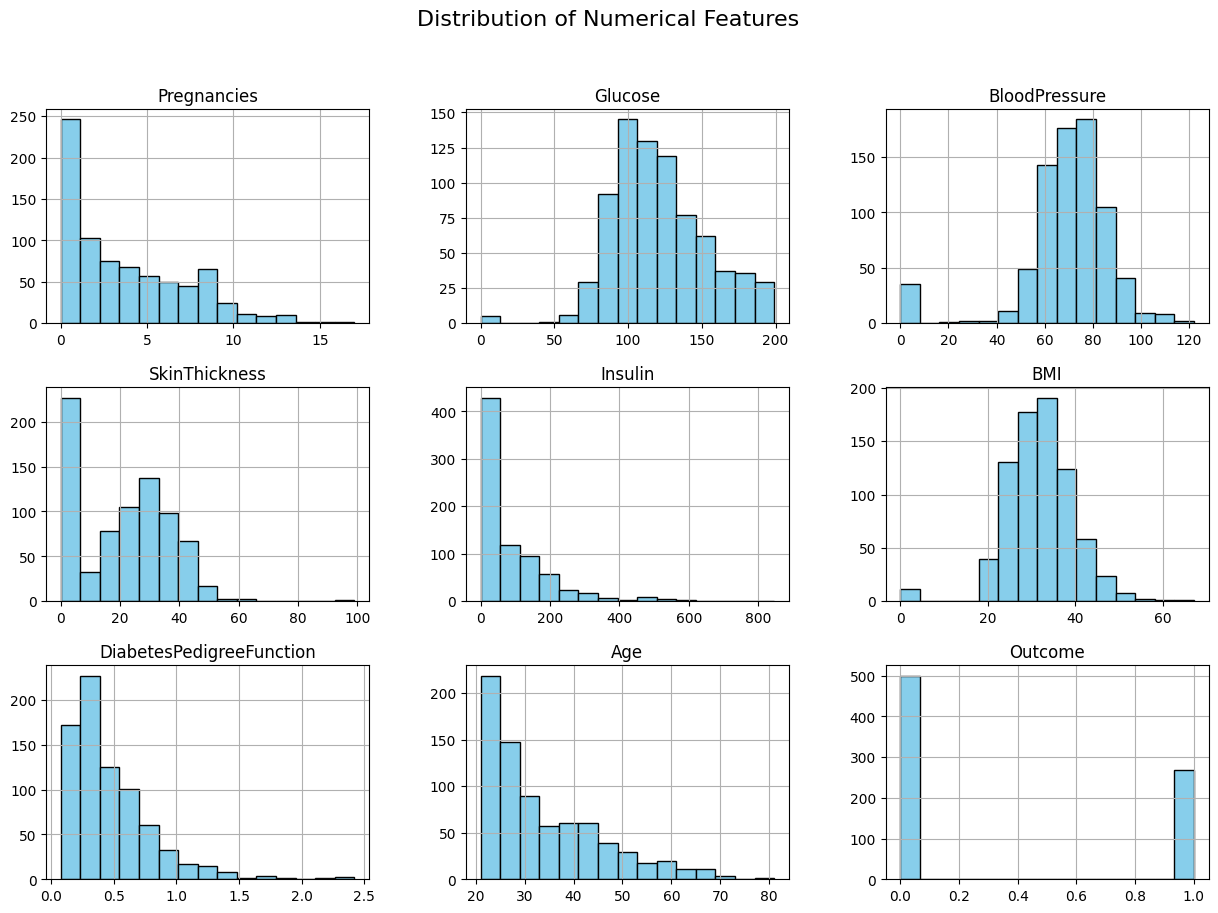

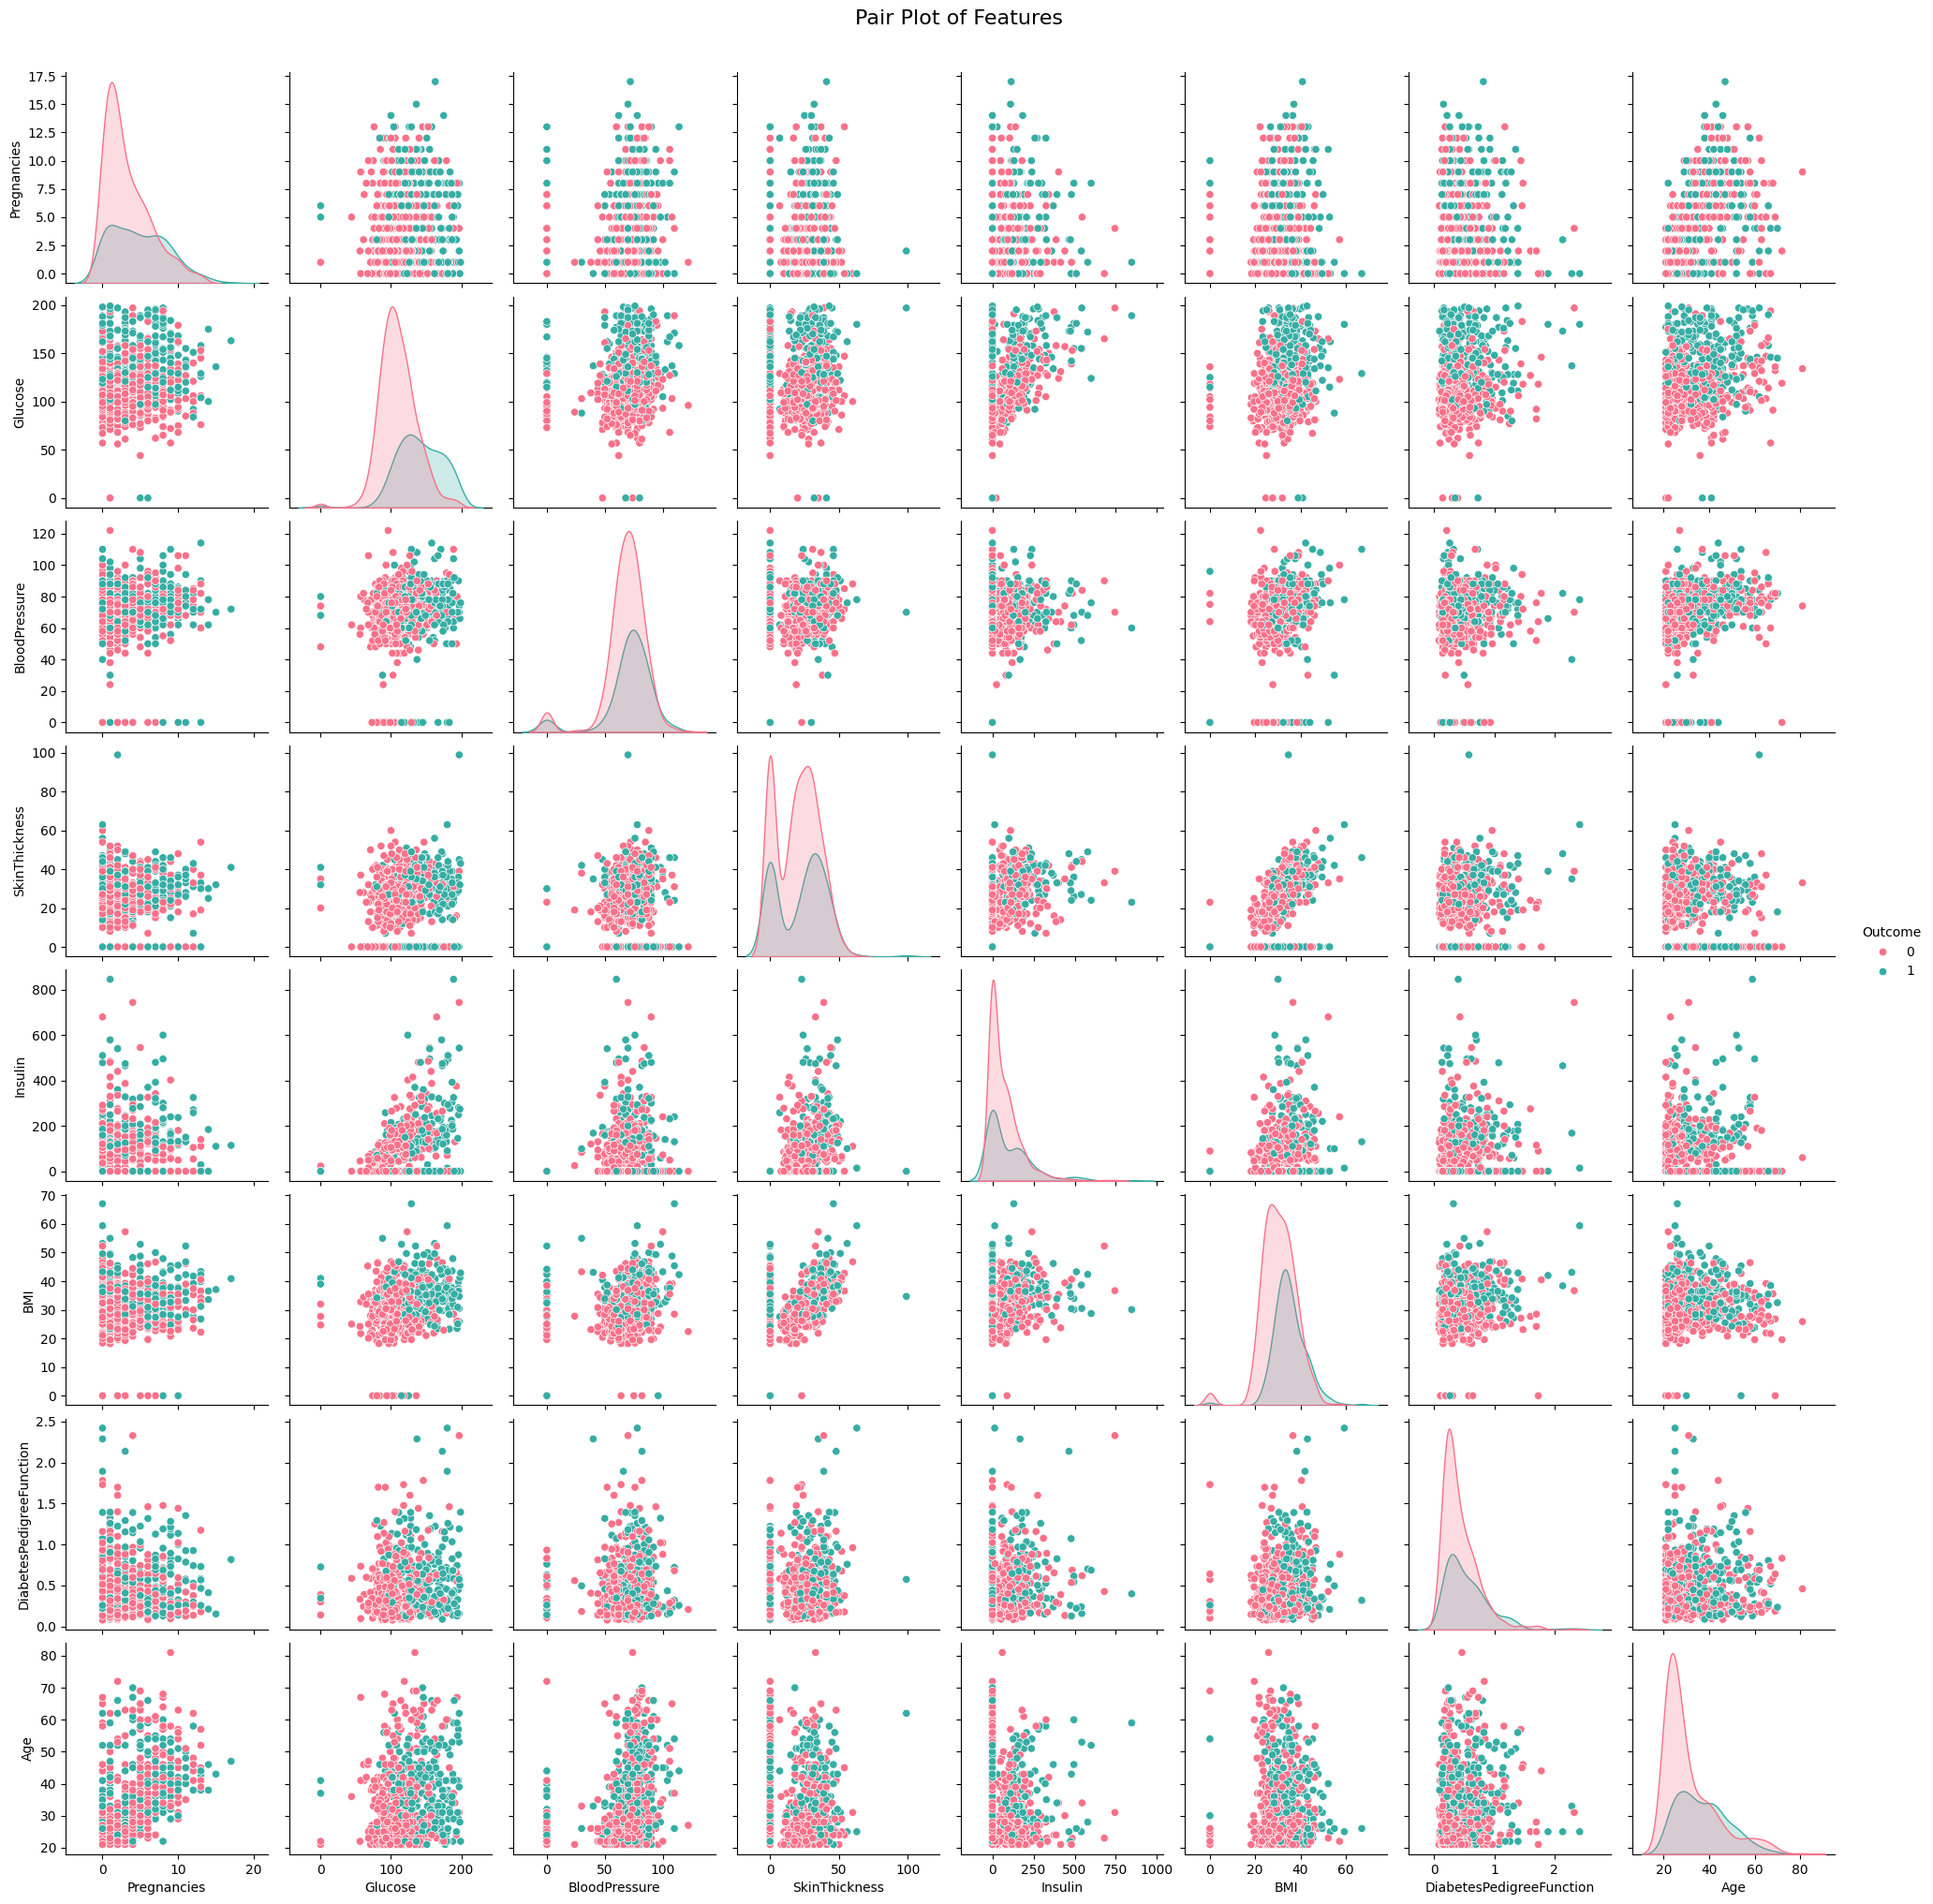

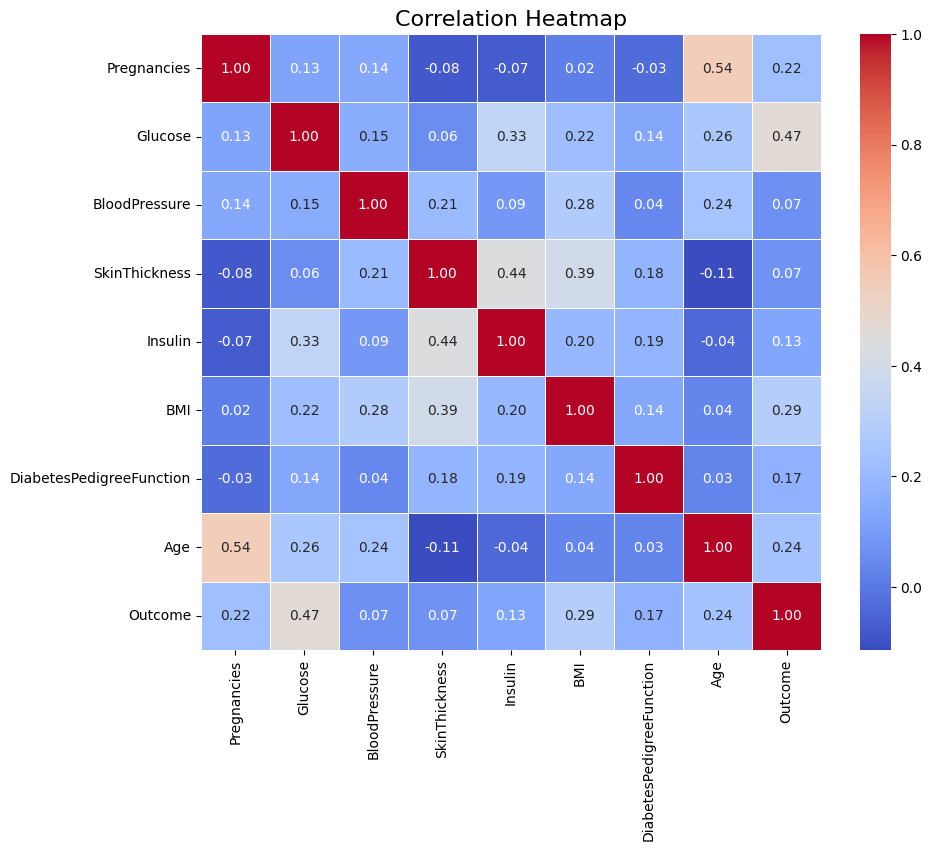

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


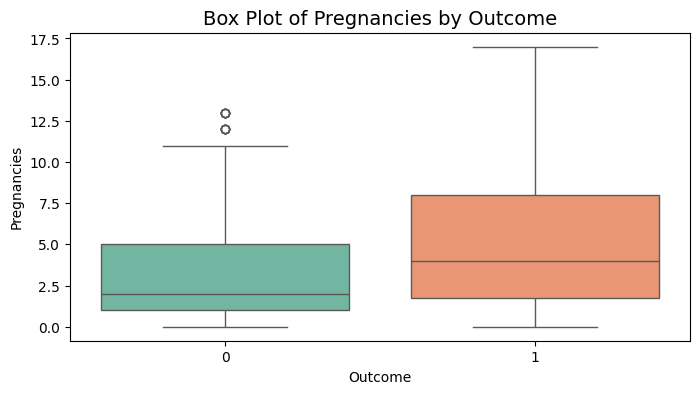

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


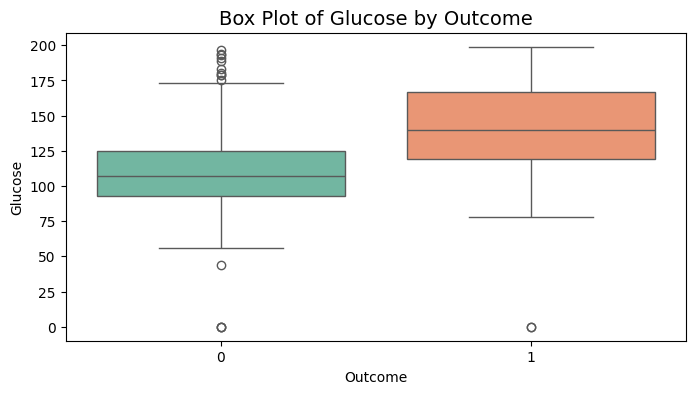

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


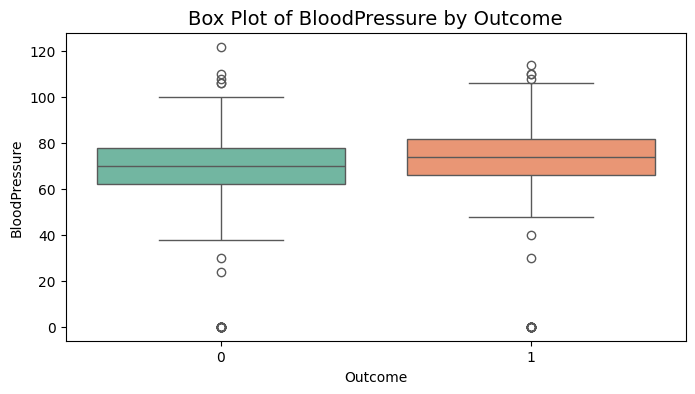

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


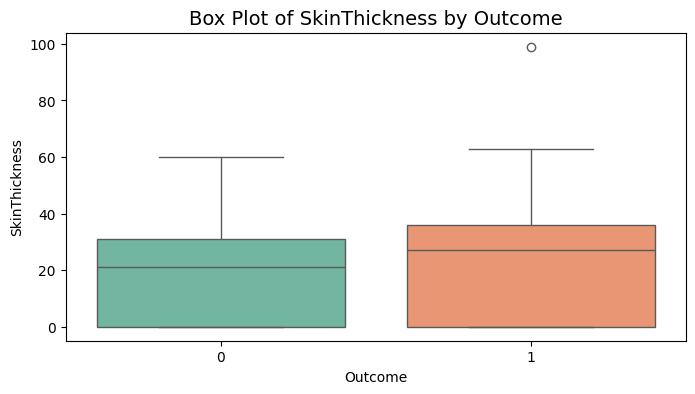

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


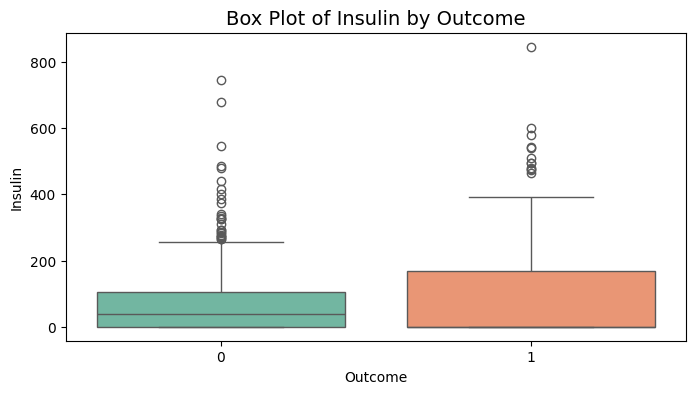

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


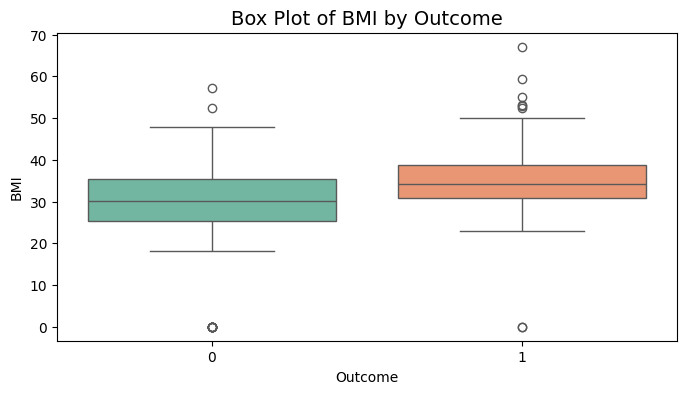

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


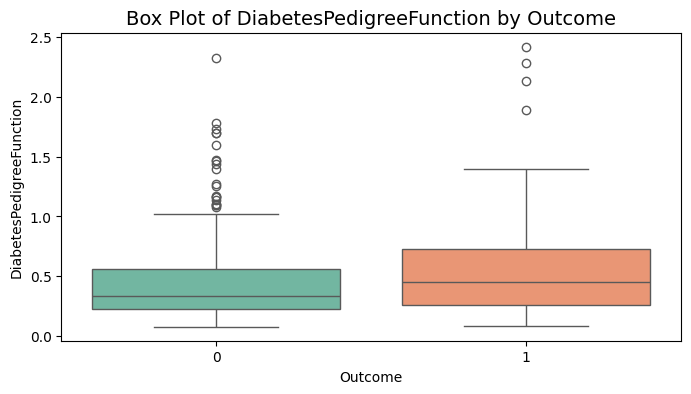

C:\Users\sanya\AppData\Local\Temp\ipykernel_12648\1640028427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')


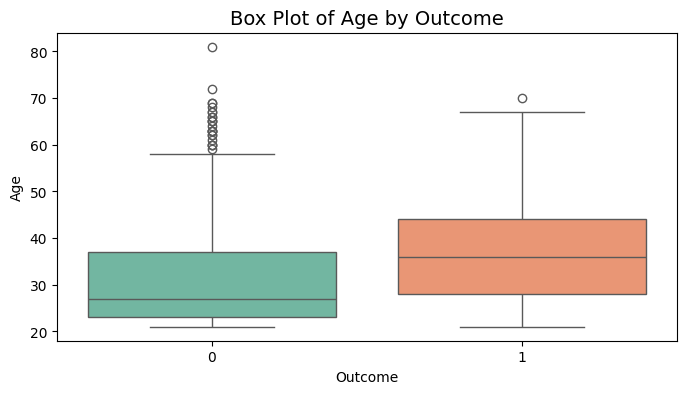

In [5]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Box plot for each feature grouped by Outcome
for column in df.columns[:-1]:  # Exclude the 'Outcome' column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=df, palette='Set2')
    plt.title(f'Box Plot of {column} by Outcome', fontsize=14)
    plt.show()

6. Divide the dataset into dependent and independent (feature selection)

In [6]:
# Independent variables (features)
X = df.drop(columns=['Outcome'])

# Dependent variable (target)
y = df['Outcome']

7. Split data into train and test 

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

8. Build the DT

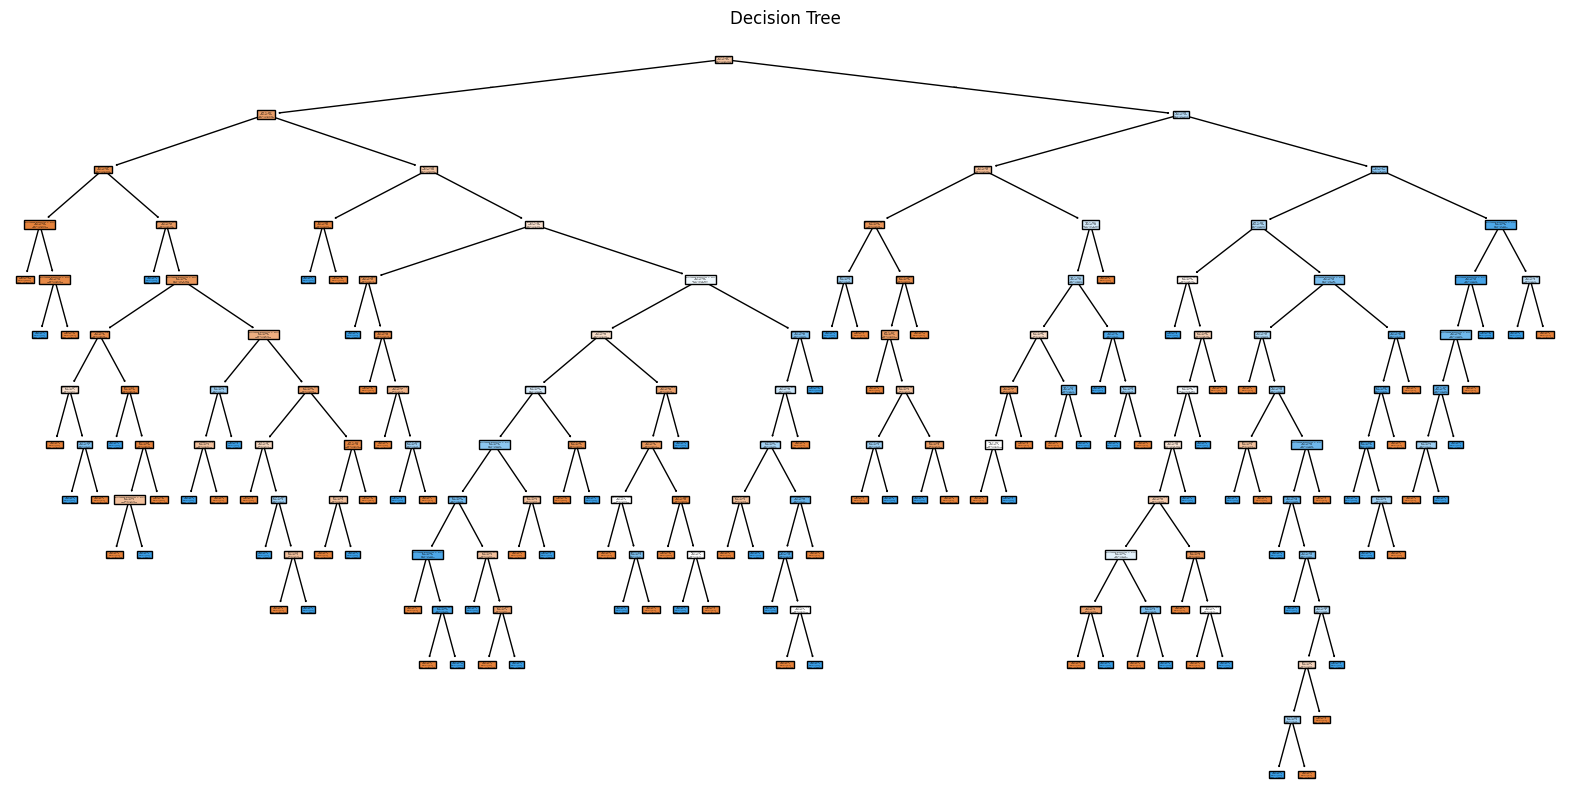

In [8]:
# Initialize the Decision Tree Classifier
dt_classifier_gini = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier_gini.fit(X_train, y_train)

# Print the tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_gini, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree")
plt.show()

9. Evaluate the model

In [9]:
# Predict on the test set
y_pred_gini= dt_classifier_gini.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gini))

# Accuracy score
accuracy = dt_classifier_gini.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[75 24]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Accuracy: 0.75


10. Visualize the DT


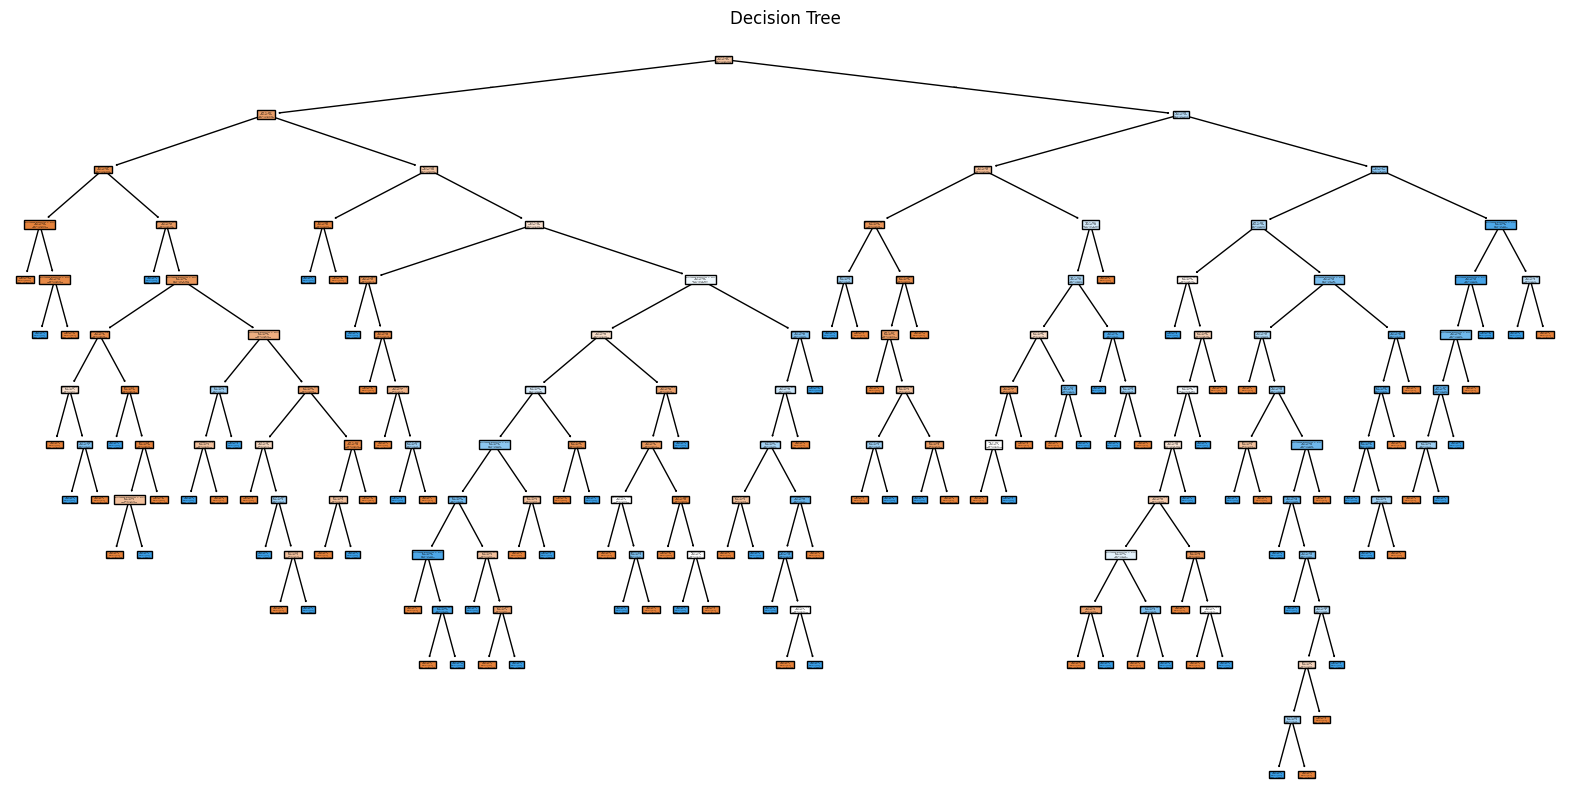

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_gini, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree")
plt.show()

11. Optimize the DT using other criterion like entropy for Information Gain (default is gini index)

In [11]:
# Initialize the Decision Tree Classifier with 'entropy' criterion
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt_classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

12. Build and visualize the DT again using the new criterion

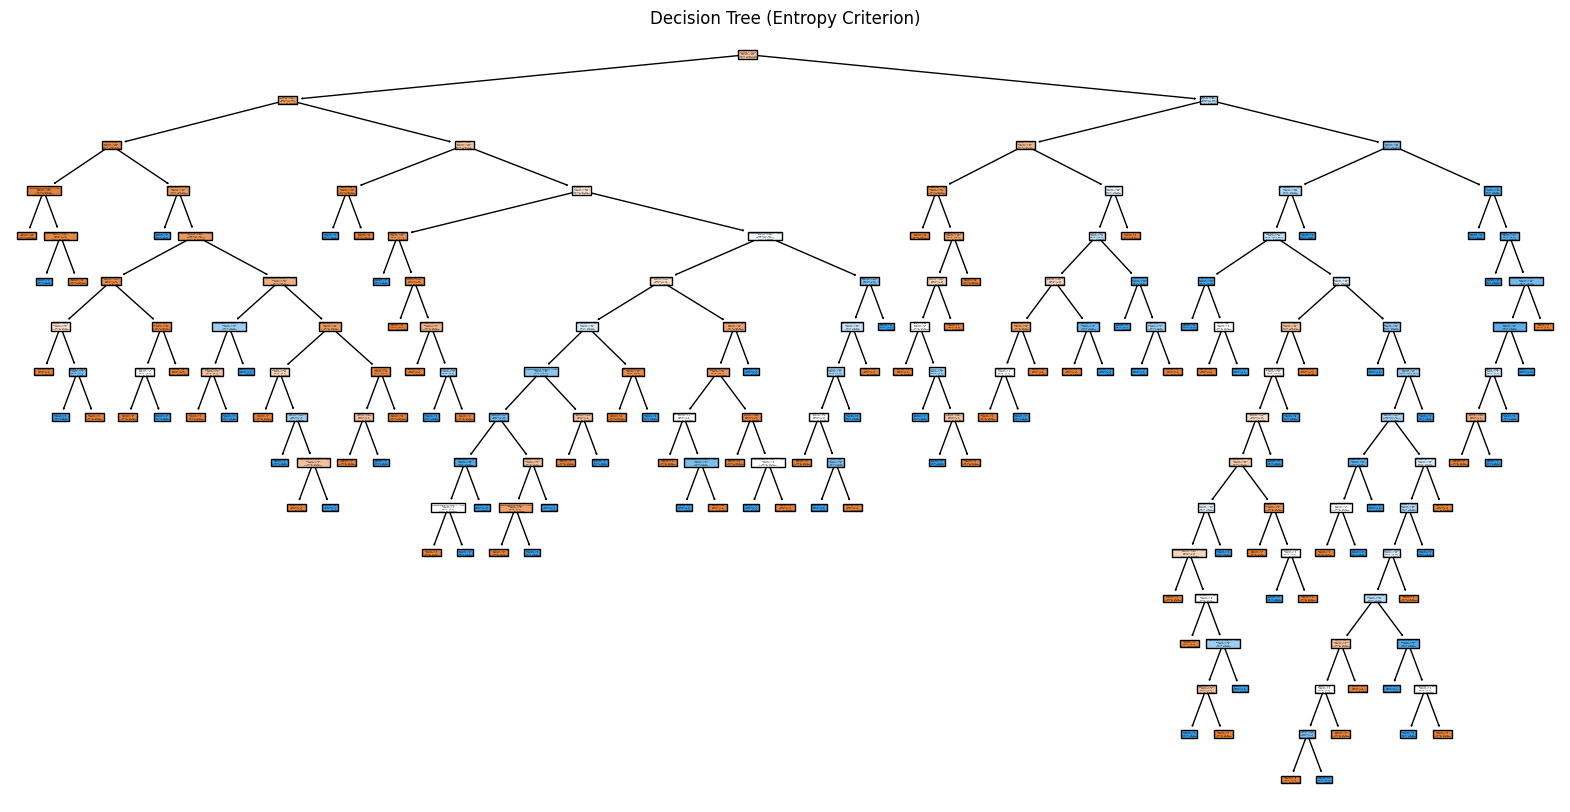

In [12]:
# Visualize the Decision Tree with 'entropy' criterion
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_entropy, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree (Entropy Criterion)")
plt.show()

13. Find the model performance ( plot the confusion matrix and find the precision, recall, and fscore)

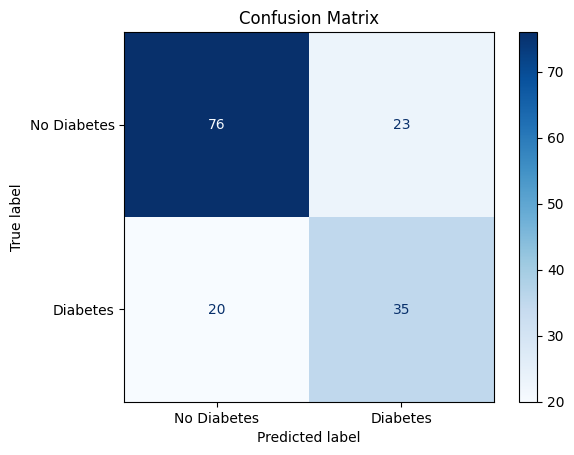

Precision: 0.60
Recall: 0.64
F1-Score: 0.62


In [13]:
y_pred_entropy = dt_classifier_entropy.predict(X_test)
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_entropy, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_entropy)
recall = recall_score(y_test, y_pred_entropy)
f1 = f1_score(y_test, y_pred_entropy)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")